<a href="https://colab.research.google.com/github/ibader85/AdvancedAnalytics/blob/main/14_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

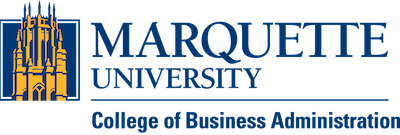

# BUAN 4061: Advanced Business Analytics
# Assignment 3 - Solution

Instructor: Dr. Badar Al Lawati

**Acknowledgment**: This material is based on the content created by `Dr. Kambiz Saffarizadeh`

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Download from Google Drive
!gdown 1Nb9b52-bwgUNnKMCWQZerZeQWmbvTEnB

Downloading...
From (original): https://drive.google.com/uc?id=1Nb9b52-bwgUNnKMCWQZerZeQWmbvTEnB
From (redirected): https://drive.google.com/uc?id=1Nb9b52-bwgUNnKMCWQZerZeQWmbvTEnB&confirm=t&uuid=c2b4b84b-606e-4a4b-8de5-affeff36c3a9
To: /content/images.zip
100% 77.7M/77.7M [00:01<00:00, 46.7MB/s]


In [3]:
# Unzip the Dataset
import os
import zipfile

zip_ref = zipfile.ZipFile('images.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
batch_size = 128

In [5]:
# Augment the Dataset
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [6]:
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = training_datagen.flow_from_directory(
	'images/train/',
	target_size=(56,56),
  color_mode="grayscale",
  batch_size=batch_size,
	class_mode='categorical',
  shuffle=True
)

Found 28821 images belonging to 7 classes.


In [8]:
test_generator = validation_datagen.flow_from_directory(
	'images/validation/',
	target_size=(56,56),
  color_mode="grayscale",
  batch_size=batch_size,
  class_mode='categorical',
  shuffle=False
)

Found 7066 images belonging to 7 classes.


In [9]:
class_names = train_generator.class_indices
class_names

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

##Let's look at how few different model layers work:

### [YouTube Video: How does Pooling Work](https://www.youtube.com/watch?v=KKmCnwGzSv8)

In [10]:
# Build the Model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = tf.keras.Sequential([
    # Features
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(56, 56, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    # Classification
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
226/226 [==============================] - 37s 129ms/step - loss: 1.8149 - accuracy: 0.2453 - val_loss: 1.7924 - val_accuracy: 0.2611
Epoch 2/10
226/226 [==============================] - 29s 126ms/step - loss: 1.7946 - accuracy: 0.2504 - val_loss: 1.7776 - val_accuracy: 0.2611
Epoch 3/10
226/226 [==============================] - 28s 125ms/step - loss: 1.7894 - accuracy: 0.2517 - val_loss: 1.7809 - val_accuracy: 0.2607
Epoch 4/10
226/226 [==============================] - 28s 124ms/step - loss: 1.7798 - accuracy: 0.2596 - val_loss: 1.7584 - val_accuracy: 0.2673
Epoch 5/10
226/226 [==============================] - 29s 127ms/step - loss: 1.7684 - accuracy: 0.2637 - val_loss: 1.7386 - val_accuracy: 0.2829
Epoch 6/10
226/226 [==============================] - 28s 122ms/step - loss: 1.7604 - accuracy: 0.2712 - val_loss: 1.7086 - val_accuracy: 0.2966
Epoch 7/10
226/226 [==============================] - 29s 126ms/step - loss: 1.7463 - accuracy: 0.2788 - val_loss: 1.6962 - val_ac

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 27, 27, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 32)        0

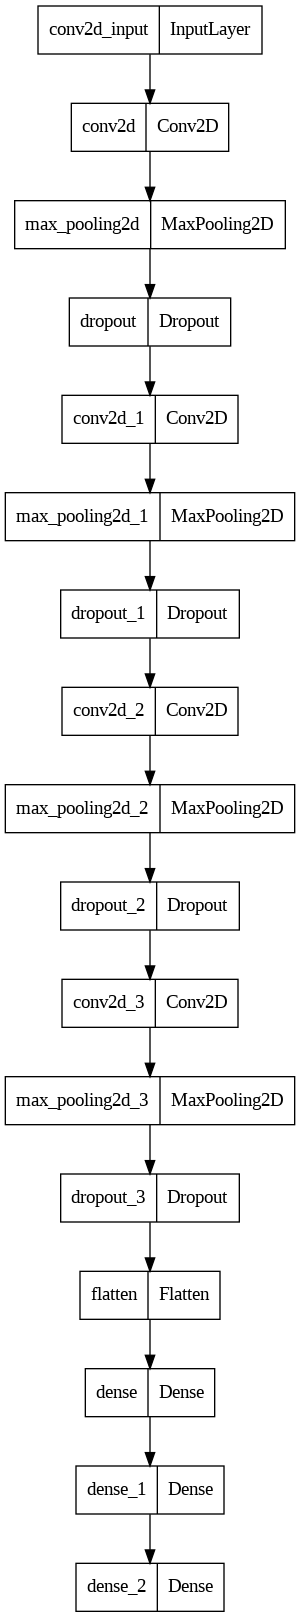

In [14]:
tf.keras.utils.plot_model(model)

In [15]:
model.evaluate(test_generator)

56/56 [==============================] - 3s 48ms/step - loss: 1.5942 - accuracy: 0.3706


[1.5941656827926636, 0.37064817547798157]

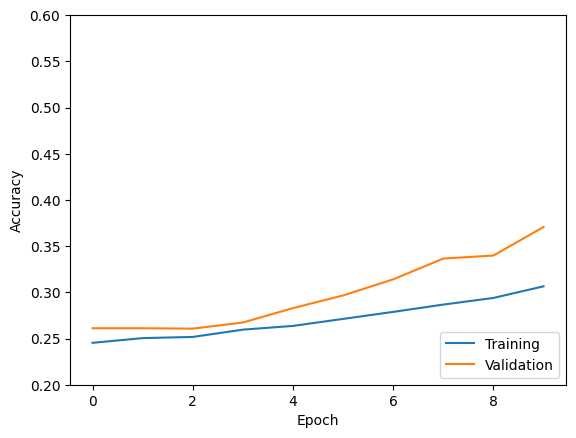

In [16]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='lower right')

In [17]:
model.predict(test_generator[10][0][1:2])

1/1 [==============================] - 0s 320ms/step


array([[0.03049407, 0.00115756, 0.18744072, 0.08288187, 0.05375453,
        0.03402973, 0.61024153]], dtype=float32)

1/1 [==============================] - 0s 19ms/step
Predicted class: sad


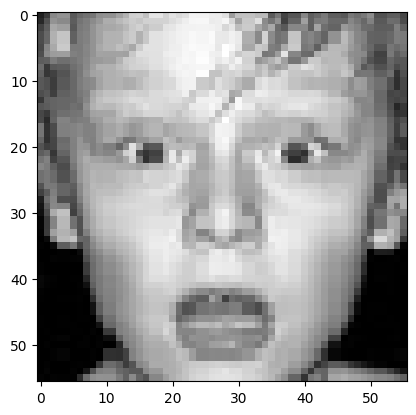

In [18]:
plt.imshow(test_generator[52][0][0], cmap='gray')
predictions = model.predict(test_generator[6][0][1:2])

# Convert the integer index to its corresponding string key
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class_name = list(class_names.keys())[predicted_class_index]

print("Predicted class:", predicted_class_name)

In [19]:
# Check the keys in class_names
print(class_names.keys())

# Ensure that the keys in class_names match the indices in predictions
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Check if the predicted_class_index exists in class_names
if predicted_class_index in class_names:
    predicted_class_name = class_names[predicted_class_index]
    print("Predicted class:", predicted_class_name)
else:
    print("Predicted class index not found in class_names dictionary.")


dict_keys(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'])
Predicted class index not found in class_names dictionary.


In [20]:
model2 = tf.keras.Sequential([
    # Features
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(56, 56, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    # Classification
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [21]:
model2.compile(optimizer='adam',
                 loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                 metrics=['accuracy'])

In [22]:
history2 = model2.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
226/226 [==============================] - 37s 144ms/step - loss: 1.8223 - accuracy: 0.2445 - val_loss: 1.8071 - val_accuracy: 0.2583
Epoch 2/50
226/226 [==============================] - 31s 139ms/step - loss: 1.7963 - accuracy: 0.2502 - val_loss: 1.7790 - val_accuracy: 0.2604
Epoch 3/50
226/226 [==============================] - 31s 137ms/step - loss: 1.7843 - accuracy: 0.2562 - val_loss: 1.7570 - val_accuracy: 0.2733
Epoch 4/50
226/226 [==============================] - 30s 134ms/step - loss: 1.7726 - accuracy: 0.2616 - val_loss: 1.7403 - val_accuracy: 0.2753
Epoch 5/50
226/226 [==============================] - 30s 134ms/step - loss: 1.7660 - accuracy: 0.2657 - val_loss: 1.7402 - val_accuracy: 0.2806
Epoch 6/50
226/226 [==============================] - 31s 137ms/step - loss: 1.7541 - accuracy: 0.2732 - val_loss: 1.7255 - val_accuracy: 0.2915
Epoch 7/50
226/226 [==============================] - 30s 133ms/step - loss: 1.7394 - accuracy: 0.2849 - val_loss: 1.6600 - val_ac

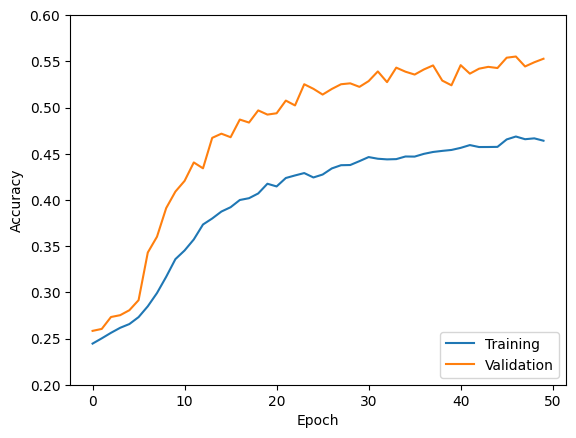

In [24]:
plt.plot(history2.history['accuracy'], label='Training')
plt.plot(history2.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='lower right')

In [25]:
#model2.evaluate(validation_generator)